In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

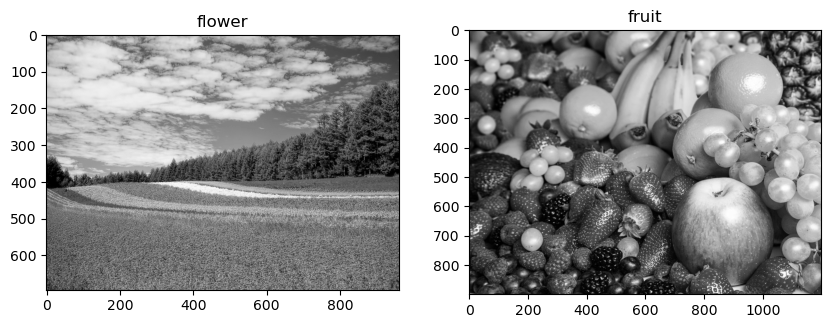

In [48]:
flower = cv.imread('img/flower1.jpg', cv.IMREAD_GRAYSCALE)
fruit = cv.imread('img/fruit.jpg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(flower, cmap='gray')
plt.title('flower')
plt.subplot(1, 2, 2)
plt.imshow(fruit, cmap='gray')
plt.title('fruit')
plt.show()

# Notch filter


## Low-pass filter


In [49]:
def notch_low_pass(img, radius=10):
    freqency_domain = np.fft.fft2(img)

    # Shift the zero-frequency component to the center of the spectrum.
    freqency_domain = np.fft.fftshift(freqency_domain)

    # plot the magnitude
    plt.imshow(20 * np.log(np.abs(freqency_domain)), cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.show()

    # get the center of the image
    center = (freqency_domain.shape[0]//2, freqency_domain.shape[1]//2)

    # create a mask
    mask = np.zeros(freqency_domain.shape)

    # set the mask
    for u in range(mask.shape[0]):
        for v in range(mask.shape[1]):
            if np.sqrt((u - center[0])**2 + (v - center[1])**2) < radius:
                mask[u, v] = 1

    # plot the mask 3d
    fig = plt.figure()
    ax = Axes3D(fig)

    fig.add_axes(ax)

    x = np.arange(0, mask.shape[0], 1)
    y = np.arange(0, mask.shape[1], 1)
    x, y = np.meshgrid(x, y)
    z = mask[x, y]

    ax.plot_surface(x, y, z, cmap='gray')
    plt.title(f"Notch Low Pass Filter with radius {radius}")
    plt.show()

    # apply the mask
    freqency_domain = freqency_domain * mask

    # Shift the zero-frequency component back to the corner of the spectrum.
    freqency_domain = np.fft.ifftshift(freqency_domain)

    # inverse fourier transform
    spatial_domain = np.fft.ifft2(freqency_domain)

    # get the magnitude
    spatial_domain = np.abs(spatial_domain)

    # normalize
    spatial_domain = spatial_domain / np.max(spatial_domain)

    # convert to uint8
    spatial_domain = np.uint8(spatial_domain * 255)

    return spatial_domain

## High-pass filter


# Test

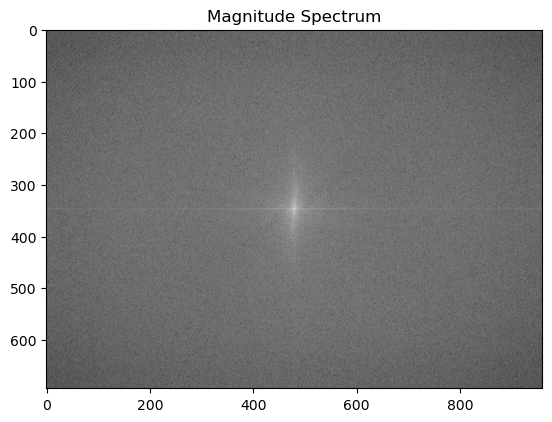

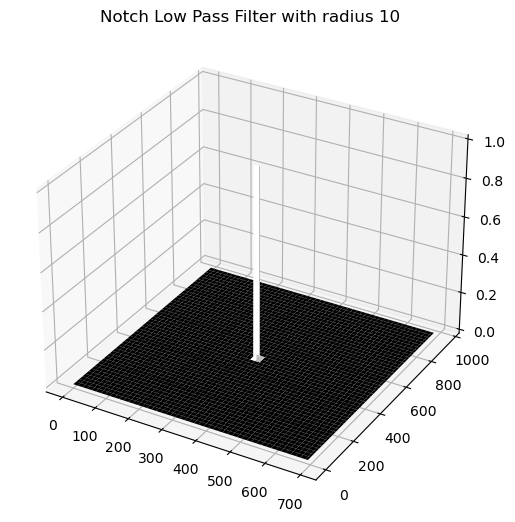

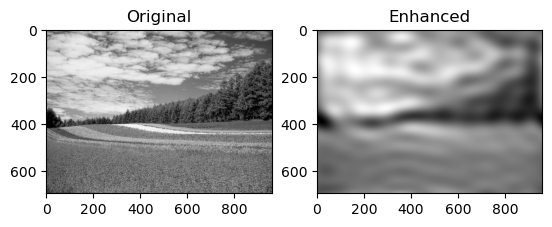

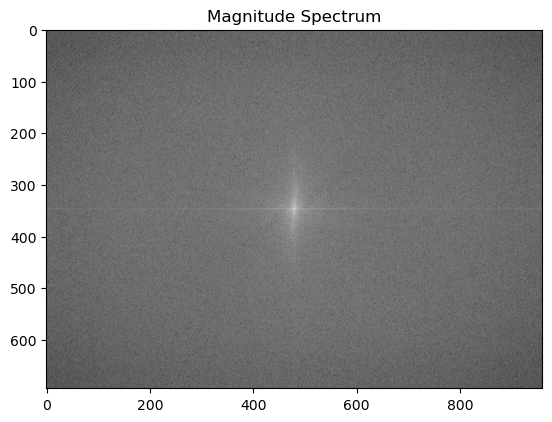

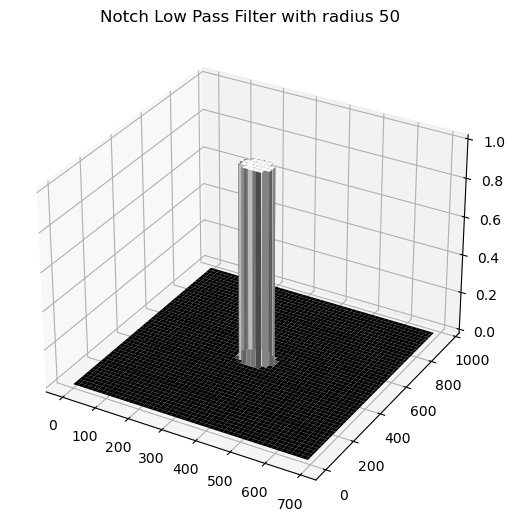

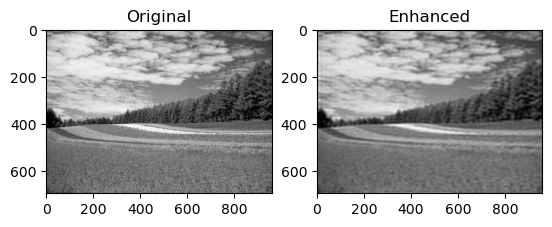

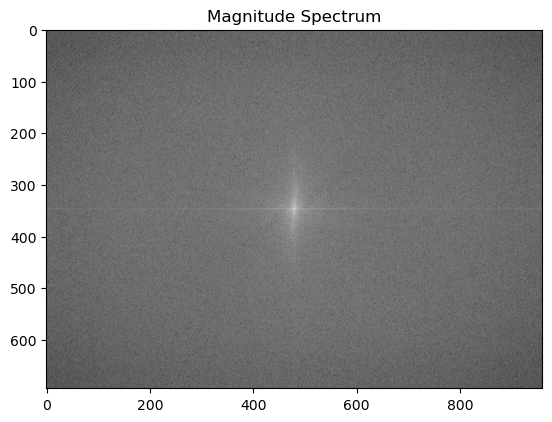

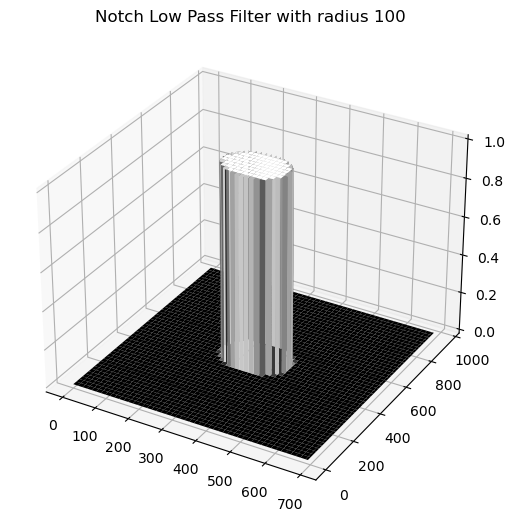

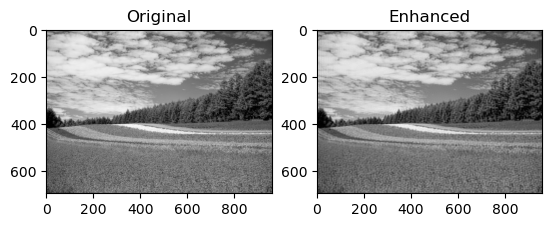

In [50]:
radiuses = [10, 50, 100]

for radius in radiuses:
    enhanced_flower = notch_low_pass(flower, radius)

    plt.subplot(1, 2, 1)
    plt.imshow(flower, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_flower, cmap='gray')
    plt.title('Enhanced')

    plt.show()